## Regression Analysis

### Setup Python File

In [14]:
# Import packages for analysis and modeling
import pandas as pd  # data frame operations
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # 2D plotting
import seaborn as sns  # Provides trellis and small multiple plotting
from scipy.stats import uniform  # for training-and-test split
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

In [15]:
#Displays all output in VS Code
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Load in Classmates Data

In [16]:
# read in coaches data into pandas dataframe
classmates = pd.read_csv("Data/Classmates_Factor.csv")

#View coaches dataframe
classmates.info()
classmates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FirstName        22 non-null     object
 1   LastName         22 non-null     object
 2   FullName         22 non-null     object
 3   Shorthand        22 non-null     object
 4   Glasses          22 non-null     int64 
 5   ListeningDevice  22 non-null     int64 
 6   Hat              22 non-null     int64 
 7   FacialHair       22 non-null     int64 
 8   HairColor        22 non-null     int64 
 9   HairLength       22 non-null     int64 
 10  ZoomBackground   22 non-null     int64 
dtypes: int64(7), object(4)
memory usage: 2.0+ KB


,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground
0,Jon,Fox,Jon Fox,jonfox,1,1,0,0,1,1,0
1,Christian,Bendillo,Christian Bendillo,christi,0,2,0,1,2,1,0
2,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,0,1,0,0,2,1,1
3,Lei,Cheng,Lei Cheng,leichen,1,2,0,0,2,1,0
4,Farahin,Choudhury,Farahin Choudhury,farahin,0,0,0,0,2,3,0


### Load in Accuracy Data

In [4]:
# read in accuracy data from Karl's models
accuracy_model1 = pd.read_csv("Data/Accuracy_Model1.csv")

#View dataframe
accuracy_model1.head()
accuracy_model1.info()

,correctName,RF_Accuracy,NB_Accuracy,kNN_Accuracy,CNN_Accuracy,Avg_Accuracy
0,andrewd,95.45,50.00,95.45,100.00,85.23
1,annieti,72.73,50.00,68.18,100.00,72.73
2,christi,100.00,90.91,100.00,100.00,97.73
3,davidla,95.45,77.27,77.27,95.65,86.41
4,farahin,100.00,77.27,100.00,100.00,94.32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   correctName   20 non-null     object 
 1   RF_Accuracy   20 non-null     float64
 2   NB_Accuracy   20 non-null     float64
 3   kNN_Accuracy  20 non-null     float64
 4   CNN_Accuracy  20 non-null     float64
 5   Avg_Accuracy  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


In [17]:
#Merge dataframe
class_accuracy = pd.merge(classmates, accuracy_model1, how='right', left_on='Shorthand', right_on='correctName')
class_accuracy
class_accuracy.info()

,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,correctName,RF_Accuracy,NB_Accuracy,kNN_Accuracy,CNN_Accuracy,Avg_Accuracy
0,Andrew,Dobkowski,Andrew Dobkowski,andrewd,0,0,1,1,2,1,1,andrewd,95.45,50.00,95.45,100.00,85.23
1,Annie,Titus,Annie Titus,annieti,1,1,0,0,2,3,2,annieti,72.73,50.00,68.18,100.00,72.73
2,Christian,Bendillo,Christian Bendillo,christi,0,2,0,1,2,1,0,christi,100.00,90.91,100.00,100.00,97.73
3,David,Ladd,David Ladd,davidla,1,0,0,0,0,0,1,davidla,95.45,77.27,77.27,95.65,86.41
4,Farahin,Choudhury,Farahin Choudhury,farahin,0,0,0,0,2,3,0,farahin,100.00,77.27,100.00,100.00,94.32
5,Garen,Moghoyan,Garen Moghoyan,garenmo,0,2,0,0,0,0,0,garenmo,95.45,86.36,90.91,100.00,93.18
6,Jessika,Pietryka,Jessika Pietryka,jessika,1,1,0,0,1,4,0,jessika,81.82,13.64,68.18,100.00,65.91
7,Jiebin,Zhu,Jiebin Zhu,jiebinz,1,0,0,0,2,1,2,jiebinz,68.18,40.91,72.73,100.00,70.46
8,Jon,Fox,Jon Fox,jonfox,1,1,0,0,1,1,0,jonfox,77.27,50.00,77.27,100.00,76.14
9,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,0,1,0,0,2,1,1,joshuab,100.00,86.36,100.00,95.65,95.50


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FirstName        20 non-null     object 
 1   LastName         20 non-null     object 
 2   FullName         20 non-null     object 
 3   Shorthand        20 non-null     object 
 4   Glasses          20 non-null     int64  
 5   ListeningDevice  20 non-null     int64  
 6   Hat              20 non-null     int64  
 7   FacialHair       20 non-null     int64  
 8   HairColor        20 non-null     int64  
 9   HairLength       20 non-null     int64  
 10  ZoomBackground   20 non-null     int64  
 11  correctName      20 non-null     object 
 12  RF_Accuracy      20 non-null     float64
 13  NB_Accuracy      20 non-null     float64
 14  kNN_Accuracy     20 non-null     float64
 15  CNN_Accuracy     20 non-null     float64
 16  Avg_Accuracy     20 non-null     float64
dtypes: float64(5), int

<AxesSubplot:>

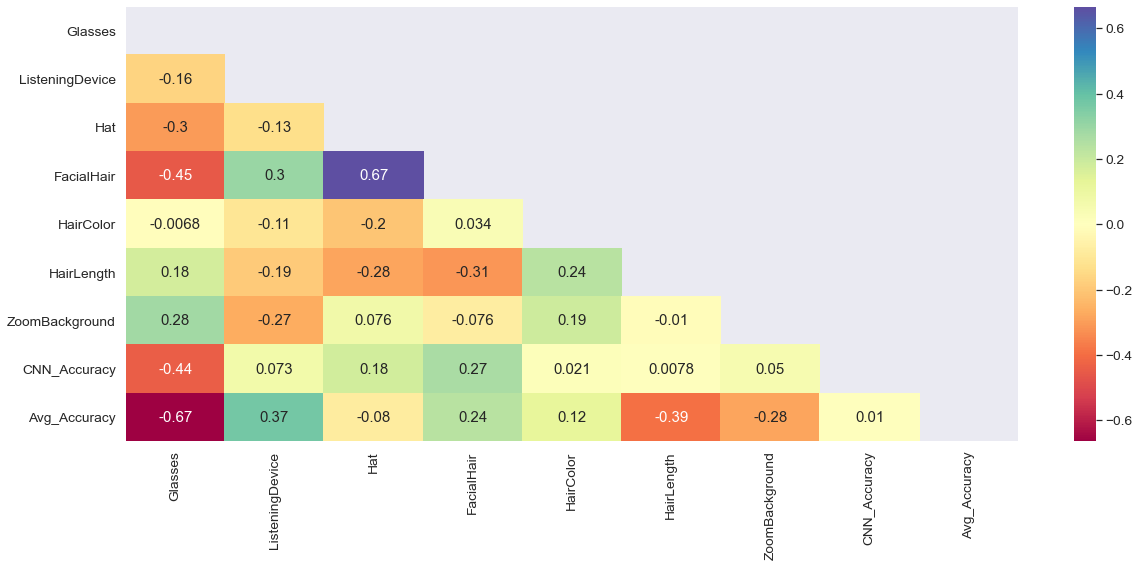

In [18]:
sns.set(rc = {'figure.figsize':(20 ,8)})
corr_data = class_accuracy.copy()
# Remove irrelevant columns
corr_data = corr_data.drop(columns=['kNN_Accuracy', 'NB_Accuracy', 'RF_Accuracy'])
corrMatrix = corr_data.corr()
# creating mask to only show bottom of matrix
mask = np.triu(np.ones_like(corrMatrix))
sns.set(font_scale=1.25)
sns.heatmap(corrMatrix, annot=True, cmap="Spectral", mask = mask)
plt.show()

### Regression Model

In [19]:
#model average
model1 = str('Avg_Accuracy ~ Glasses + ListeningDevice + Hat + FacialHair + HairColor + HairLength + ZoomBackground')
# fit the model to the training set
train_model_fit = smf.ols(model1, data = class_accuracy).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

# AdjR2 = 0.493

                            OLS Regression Results                            
Dep. Variable:           Avg_Accuracy   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     4.135
Date:                Tue, 22 Mar 2022   Prob (F-statistic):             0.0154
Time:                        14:31:47   Log-Likelihood:                -61.308
No. Observations:                  20   AIC:                             138.6
Df Residuals:                      12   BIC:                             146.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          90.9450      5.191     

In [20]:
#model average
model1 = str('Avg_Accuracy ~ Glasses + Hat + HairLength')
# fit the model to the training set
train_model_fit = smf.ols(model1, data = class_accuracy).fit()
# summary of model fit to the training set
print(train_model_fit.summary())

# AdjR2 = 0.493

                            OLS Regression Results                            
Dep. Variable:           Avg_Accuracy   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     10.42
Date:                Tue, 22 Mar 2022   Prob (F-statistic):           0.000482
Time:                        14:31:51   Log-Likelihood:                -62.750
No. Observations:                  20   AIC:                             133.5
Df Residuals:                      16   BIC:                             137.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.3976      2.809     34.322      0.0

In [21]:
# read in coaches data into pandas dataframe
classmates = pd.read_csv("Data/Roster_Export_-_2022-0112_IST_718_Big_Data_Analytics.csv")

#View coaches dataframe
classmates.info()
classmates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   FirstName        20 non-null     object
 1   LastName         20 non-null     object
 2   FullName         20 non-null     object
 3   Shorthand        20 non-null     object
 4   Glasses          20 non-null     object
 5   ListeningDevice  20 non-null     object
 6   Hat              20 non-null     object
 7   FacialHair       20 non-null     object
 8   HairColor        20 non-null     object
 9   HairLength       20 non-null     object
 10  ZoomBackground   20 non-null     object
dtypes: object(11)
memory usage: 1.8+ KB


,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground
0,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None
1,Christian,Bendillo,Christian Bendillo,christi,No,Headphones,No,Yes,Dark,Short,None
2,Joshua,Biggs-Bauer,Joshua Biggs-Bauer,joshuab,No,Ear buds,No,No,Dark,Short,Blurred
3,Lei,Cheng,Lei Cheng,leichen,Yes,Headphones,No,No,Dark,Short,None
4,Farahin,Choudhury,Farahin Choudhury,farahin,No,None,No,No,Dark,Long,None


In [58]:
# read in accuracy data from Karl's models
accuracy_model1 = pd.read_csv("Data/Accuracy_Model1.csv")

#View dataframe
accuracy_model1.head()
accuracy_model1.info()

#Merge dataframe
class_accuracy = pd.merge(classmates, accuracy_model1, how='right', left_on='Shorthand', right_on='correctName')
class_accuracy
class_accuracy.info()

,correctName,RF_Accuracy,NB_Accuracy,kNN_Accuracy,CNN_Accuracy,Avg_Accuracy
0,jessika,81.82,13.64,68.18,100.0,65.91
1,katieha,72.73,36.36,77.27,91.3,69.42
2,jiebinz,68.18,40.91,72.73,100.0,70.46
3,annieti,72.73,50.00,68.18,100.0,72.73
4,jonfox,77.27,50.00,77.27,100.0,76.14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   correctName   20 non-null     object 
 1   RF_Accuracy   20 non-null     float64
 2   NB_Accuracy   20 non-null     float64
 3   kNN_Accuracy  20 non-null     float64
 4   CNN_Accuracy  20 non-null     float64
 5   Avg_Accuracy  20 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.1+ KB


,FirstName,LastName,FullName,Shorthand,Glasses,ListeningDevice,Hat,FacialHair,HairColor,HairLength,ZoomBackground,correctName,RF_Accuracy,NB_Accuracy,kNN_Accuracy,CNN_Accuracy,Avg_Accuracy
0,Jessika,Pietryka,Jessika Pietryka,jessika,Yes,Ear buds,No,No,Light,Ponytail,None,jessika,81.82,13.64,68.18,100.00,65.9100
1,Katie,Haugh,Katie Haugh,katieha,Yes,None,No,No,Light,Long,None,katieha,72.73,36.36,77.27,91.30,69.4200
2,Jiebin,Zhu,Jiebin Zhu,jiebinz,Yes,None,No,No,Dark,Short,Image,jiebinz,68.18,40.91,72.73,100.00,70.4600
3,Annie,Titus,Annie Titus,annieti,Yes,Ear buds,No,No,Dark,Long,Image,annieti,72.73,50.00,68.18,100.00,72.7300
4,Jon,Fox,Jon Fox,jonfox,Yes,Ear buds,No,No,Light,Short,None,jonfox,77.27,50.00,77.27,100.00,76.1400
5,Seth,Rissmiller,Seth Rissmiller,sethris,Yes,Ear buds,No,No,Dark,Short,None,sethris,90.91,31.82,86.36,100.00,77.2700
6,Karl,Treen,Karl Treen,karltre,No,Ear buds,Yes,Yes,None,Bald,None,karltre,86.36,45.45,81.82,100.00,78.4100
7,Nick,Waine,Nick Waine,nickwai,No,None,No,No,Dark,Short,None,nickwai,95.45,36.36,90.91,100.00,80.6800
8,Noe,Fernandes,Noe Fernandes,noefern,Yes,None,No,No,Dark,Short,None,noefern,72.73,81.82,81.82,95.65,83.0100
9,Andrew,Dobkowski,Andrew Dobkowski,andrewd,No,None,Yes,Yes,Dark,Short,Blurred,andrewd,95.45,50.00,95.45,100.00,85.2300


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   FirstName        20 non-null     object 
 1   LastName         20 non-null     object 
 2   FullName         20 non-null     object 
 3   Shorthand        20 non-null     object 
 4   Glasses          20 non-null     object 
 5   ListeningDevice  20 non-null     object 
 6   Hat              20 non-null     object 
 7   FacialHair       20 non-null     object 
 8   HairColor        20 non-null     object 
 9   HairLength       20 non-null     object 
 10  ZoomBackground   20 non-null     object 
 11  correctName      20 non-null     object 
 12  RF_Accuracy      20 non-null     float64
 13  NB_Accuracy      20 non-null     float64
 14  kNN_Accuracy     20 non-null     float64
 15  CNN_Accuracy     20 non-null     float64
 16  Avg_Accuracy     20 non-null     float64
dtypes: float64(5), obj

In [27]:
# Melt Table
melt = pd.melt(class_accuracy, id_vars=['Shorthand'], value_vars=['RF_Accuracy', 'NB_Accuracy', 'kNN_Accuracy', 'CNN_Accuracy'])

melt

,Shorthand,variable,value
0,andrewd,RF_Accuracy,95.45
1,annieti,RF_Accuracy,72.73
2,christi,RF_Accuracy,100.00
3,davidla,RF_Accuracy,95.45
4,farahin,RF_Accuracy,100.00
...,...,...,...
75,noahlar,CNN_Accuracy,100.00
76,noefern,CNN_Accuracy,95.65
77,sandys,CNN_Accuracy,100.00
78,sethris,CNN_Accuracy,100.00


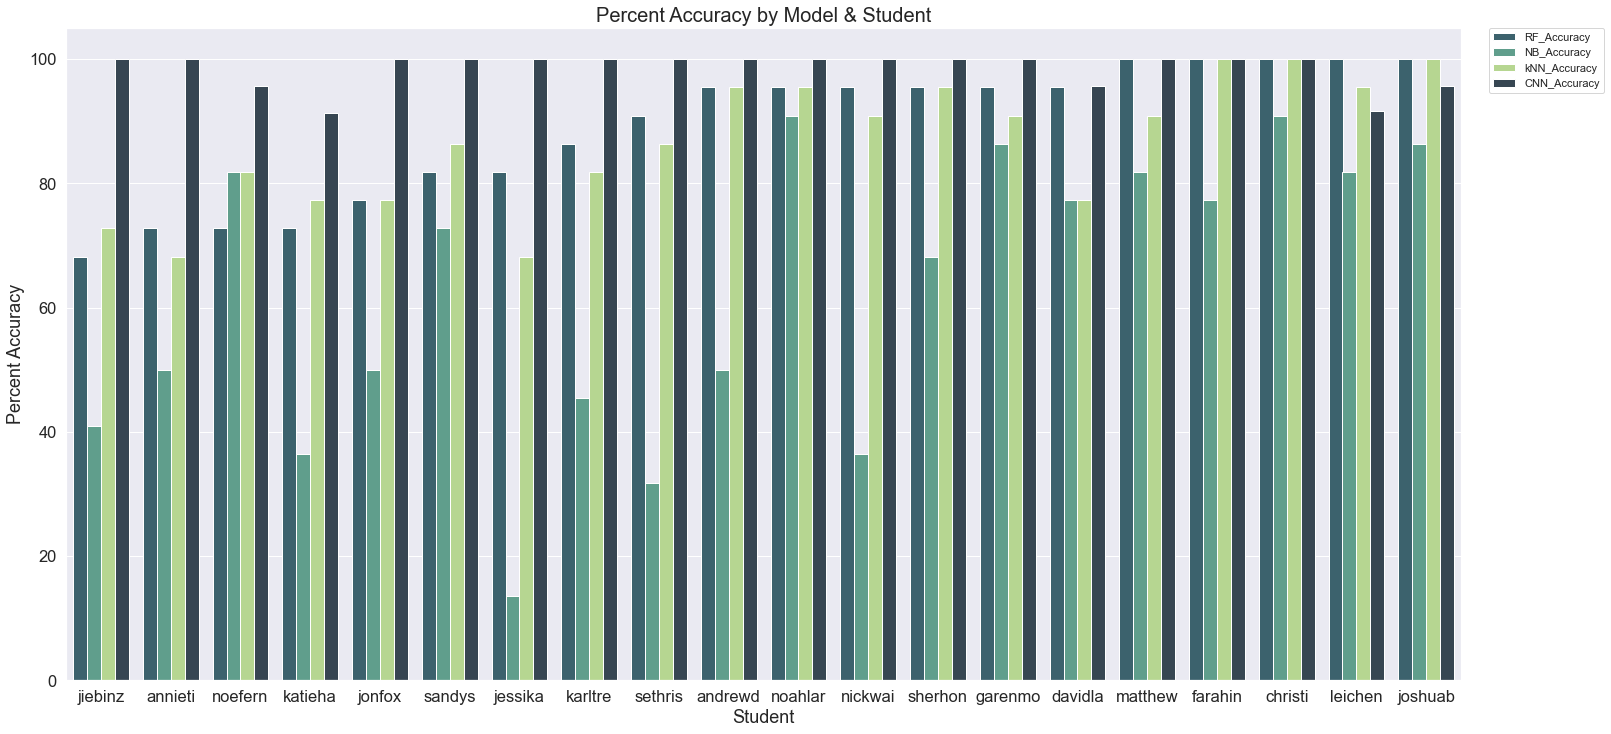

In [50]:
# Define figure
fig, ax = plt.subplots(1, figsize=(25, 12))


#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart
sns.barplot(x='Shorthand', y='value', hue='variable', data=melt, palette=['#346675','#56a890','#b7e186','#324756'], order=melt.iloc[melt[melt['variable'] == 'RF_Accuracy']['value'].sort_values().index]['Shorthand'])
plt.title('Percent Accuracy by Model & Student',size=20)
plt.xlabel('Student',size=18)
plt.ylabel("Percent Accuracy",size=18)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale = 1.5);

In [59]:
# Melt Tables
melt = pd.melt(class_accuracy, id_vars=['Shorthand'], value_vars=['Avg_Accuracy'])

melt

,Shorthand,variable,value
0,jessika,Avg_Accuracy,65.9100
1,katieha,Avg_Accuracy,69.4200
2,jiebinz,Avg_Accuracy,70.4600
3,annieti,Avg_Accuracy,72.7300
4,jonfox,Avg_Accuracy,76.1400
5,sethris,Avg_Accuracy,77.2700
6,karltre,Avg_Accuracy,78.4100
7,nickwai,Avg_Accuracy,80.6800
8,noefern,Avg_Accuracy,83.0100
9,andrewd,Avg_Accuracy,85.2300


Text(0.5, 1.0, 'Average Percent Accuracy by Student')

Text(0.5, 0, 'Student')

Text(0, 0.5, 'Average Percent Accuracy')

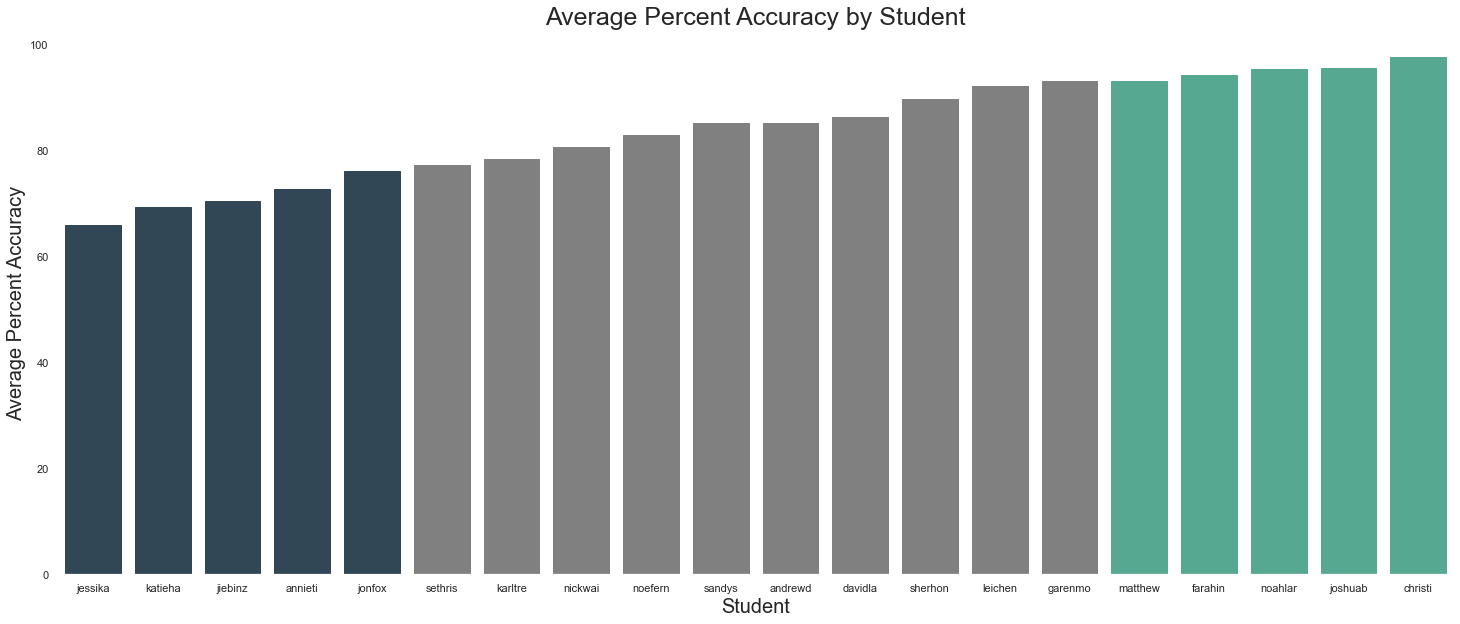

In [65]:
# Define figure
fig, ax = plt.subplots(1, figsize=(25, 10))

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set(style="ticks")

#create grouped bar chart
ax = sns.barplot(x='Shorthand', y='value', data=melt, ci=None, order=melt.sort_values('value').Shorthand) 
plt.title('Average Percent Accuracy by Student',size=25)
plt.xlabel('Student',size=20)
plt.ylabel("Average Percent Accuracy",size=20);
ax.set_facecolor('white')
sns.set(font_scale = 1)

for bar in ax.patches:
    if bar.get_height() > 93.18:
        bar.set_color('#56a890')
    elif bar.get_height() < 77:
        bar.set_color('#324756')    
    else:
        bar.set_color('grey')
